In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn tensorflow numpy

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/01/a5/931fc3ad333d9d87b10107d948d757d67ebcfc33b1988d5faccc39c6845c/pandas-2.3.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.7 MB/s eta 0:00:00
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/6e/45/c51cb248e679a6c6ab14b7a8e3ead3f4a3fe7425fc7a6f98b3f147bec532/numpy-2.3.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 16.9 MB/s eta 0:00:00
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/08/17/804cc13b22a8663564bb0b55fb89e661a577e4e88a61a39740d58b909efe/scikit_learn-1.7.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c4/91/ba0ae1ff4b3f30972ad01cd4a8029e70

In [6]:
import pandas as pd

colonnes_nutriscore = [
    "energy-kj_100g",
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "unsaturated-fat_100g",
    "omega-3-fat_100g",
    "sugars_100g",
    "added-sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "cholesterol_100g",
    "vitamin-a_100g",
    "vitamin-c_100g",
    "vitamin-d_100g",
    "calcium_100g",
    "magnesium_100g",
    "zinc_100g",
    "manganese_100g",
    "caffeine_100g",
    "alcohol_100g",
    "nutriscore_grade",
    "product_name"
]

# Lire uniquement les colonnes disponibles dans le fichier
df_header = pd.read_csv("../datas/FoodProduct_sample.csv", nrows=0)
colonnes_disponibles = df_header.columns.tolist()

# Filtrer la liste pour ne garder que les colonnes existantes
colonnes_a_charger = [col for col in colonnes_nutriscore if col in colonnes_disponibles]

print(f"Colonnes demandées : {len(colonnes_nutriscore)}")
print(f"Colonnes trouvées dans le fichier : {len(colonnes_disponibles)}")
print(f"Colonnes qui seront chargées : {len(colonnes_a_charger)}")
print(f"Colonnes manquantes (non trouvées) : {[col for col in colonnes_nutriscore if col not in colonnes_disponibles]}")

# Charger uniquement les colonnes existantes
df = pd.read_csv("../datas/FoodProduct_sample.csv",
    encoding='utf-8',
    usecols=colonnes_a_charger
)
# Garder uniquement colonnes existantes
colonnes_extraites = [col for col in colonnes_nutriscore if col in df.columns]
df_nutriscore = df[colonnes_extraites]

# Supprimer lignes avec nutriscore_grade non valide
valeurs_a_supprimer = ["unknown", "unknow", "not-applicable"]
df_nutriscore = df_nutriscore[~df_nutriscore["nutriscore_grade"].isin(valeurs_a_supprimer)]

# Calculer la moyenne énergie par Nutri-Score (exclure NaN)
moyenne_energie_par_score_kj = df_nutriscore.groupby("nutriscore_grade")["energy-kj_100g"].mean()
moyenne_energie_par_score_kcal = df_nutriscore.groupby("nutriscore_grade")["energy-kcal_100g"].mean()

# Fonction générique pour remplacer NaN énergie par moyenne selon Nutri-Score
def remplacer_energie(row, colonne, moyenne_par_score):
    if pd.isna(row[colonne]):
        return moyenne_par_score.get(row["nutriscore_grade"], 0)
    return row[colonne]

# Appliquer remplacement pour energy-kj_100g
df_nutriscore["energy-kj_100g"] = df_nutriscore.apply(lambda row: remplacer_energie(row, "energy-kj_100g", moyenne_energie_par_score_kj), axis=1)

# Appliquer remplacement pour energy-kcal_100g
df_nutriscore["energy-kcal_100g"] = df_nutriscore.apply(lambda row: remplacer_energie(row, "energy-kcal_100g", moyenne_energie_par_score_kcal), axis=1)

# Pour les autres colonnes numériques, remplacer NaN par 0
colonnes_num = df_nutriscore.columns.difference(["nutriscore_grade", "energy-kj_100g", "energy-kcal_100g"])
df_nutriscore[colonnes_num] = df_nutriscore[colonnes_num].fillna(0)


# Renommer colonnes pour plus de clarté (exemple, adapte si tu veux)
renommage_colonnes = {
    "energy-kj_100g": "Énergie (kJ/100g)",
    "energy-kcal_100g": "Énergie (kcal/100g)",
    "fat_100g": "Matières grasses (g/100g)",
    "saturated-fat_100g": "Graisses saturées (g/100g)",
    "unsaturated-fat_100g": "Graisses insaturées (g/100g)",
    "omega-3-fat_100g": "Oméga 3 (g/100g)",
    "sugars_100g": "Sucres (g/100g)",
    "added-sugars_100g": "Sucres ajoutés (g/100g)",
    "fiber_100g": "Fibres totales (g/100g)",
    "proteins_100g": "Protéines (g/100g)",
    "salt_100g": "Sel (g/100g)",
    "cholesterol_100g": "Cholestérol (mg/100g)",
    "vitamin-a_100g": "Vitamine A (µg/100g)",
    "vitamin-c_100g": "Vitamine C (mg/100g)",
    "vitamin-d_100g": "Vitamine D (µg/100g)",
    "calcium_100g": "Calcium (mg/100g)",
    "magnesium_100g": "Magnésium (mg/100g)",
    "zinc_100g": "Zinc (mg/100g)",
    "manganese_100g": "Manganèse (mg/100g)",
    "caffeine_100g": "Caféine (mg/100g)",
    "alcohol_100g": "Alcool (g/100g)",
    "nutriscore_grade": "Nutri-Score",
    "product_name": "Nom du Produit"
}

df_nutriscore.rename(columns=renommage_colonnes, inplace=True)

df_nutriscore.reset_index(drop=True, inplace=True)

# Sauvegarder
df_nutriscore.to_csv("../datas/FoodProduct_modifier.csv", index=False, encoding='utf-8')

print("✅ Données nettoyées et enrichies sauvegardées.")
print(df_nutriscore.head())



Colonnes demandées : 23
Colonnes trouvées dans le fichier : 209
Colonnes qui seront chargées : 23
Colonnes manquantes (non trouvées) : []
✅ Données nettoyées et enrichies sauvegardées.
   Énergie (kJ/100g)  Énergie (kcal/100g)  Matières grasses (g/100g)  \
0             5308.0                 61.0                        0.0   
1             2401.0                324.0                       12.0   
2             1620.0                376.0                        1.6   
3             1522.0                363.0                       11.0   
4             1522.0                  1.0                        1.0   

   Graisses saturées (g/100g)  Graisses insaturées (g/100g)  Oméga 3 (g/100g)  \
0                       0.012                           0.0               0.0   
1                      10.500                           0.0               0.0   
2                       0.200                           0.0               0.0   
3                       2.000                           0.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# On part de df_nutriscore déjà nettoyé

# 1. Sélectionner colonnes numériques (exclure Nutri-Score)
colonnes_numeriques = df_nutriscore.select_dtypes(include=['number']).columns

# 2. Calcul de la matrice de corrélation
matrice_corr = df_nutriscore[colonnes_numeriques].corr()

print(matrice_corr)

# 3. (Optionnel) Visualisation avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(matrice_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des variables nutritionnelles")
plt.show()


AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Préparer X et y
X = df_nutriscore.drop(columns=['Nutri-Score'])
X = X.select_dtypes(include=['number'])  # garder que les colonnes numériques

y = df_nutriscore['Nutri-Score']

# 2. Encoder les labels Nutri-Score (A,B,C,D,E) en nombres 0-4
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

# 3. Séparer en train/test (stratification pour conserver proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# 4. Créer le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Prédictions sur test
y_pred = model.predict(X_test)

# 6. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur test : {accuracy:.2f}\n")

print("Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# 7. Afficher l'importance des variables
importances = model.feature_importances_
features = X.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Importance des variables dans la prédiction du Nutri-Score")
plt.xlabel("Importance")
plt.ylabel("Composants nutritionnels")
plt.tight_layout()
plt.show()


AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

Moyenne des sucres (g/100g) par Nutri-Score :
Nutri-Score
A     1.655000
B          NaN
C     2.475714
D    17.359887
E    10.320000
Name: Sucres (g/100g), dtype: float64


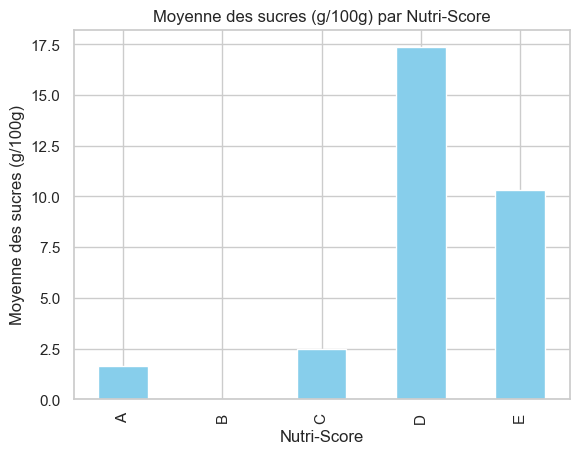

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier propre
df = pd.read_csv("../datas/FoodProduct_modifier.csv", encoding='utf-8')

# Nettoyer la colonne Nutri-Score (enlever espaces, mettre en majuscules)
df['Nutri-Score'] = df['Nutri-Score'].str.strip().str.upper()

# Convertir la colonne sucre en numérique, forcer les erreurs en NaN
df['Sucres (g/100g)'] = pd.to_numeric(df['Sucres (g/100g)'], errors='coerce')

# Supprimer les lignes où Nutri-Score n'est pas dans ['A','B','C','D','E']
df = df[df['Nutri-Score'].isin(['A', 'B', 'C', 'D', 'E'])]

# Calculer la moyenne de sucre par Nutri-Score (en ignorant les NaN)
moyenne_sucre_par_score = df.groupby('Nutri-Score')['Sucres (g/100g)'].mean()

# Réordonner selon l'ordre Nutri-Score (A à E)
ordre = ['A', 'B', 'C', 'D', 'E']
moyenne_sucre_par_score = moyenne_sucre_par_score.reindex(ordre)

# Afficher la moyenne en console
print("Moyenne des sucres (g/100g) par Nutri-Score :")
print(moyenne_sucre_par_score)

# Tracer un graphique en barres
moyenne_sucre_par_score.plot(kind='bar', color='skyblue')
plt.title("Moyenne des sucres (g/100g) par Nutri-Score")
plt.xlabel("Nutri-Score")
plt.ylabel("Moyenne des sucres (g/100g)")
plt.ylim(0)  # commence à zéro pour une meilleure lisibilité
plt.show()


Moyenne des graisses saturées (g/100g) par Nutri-Score :
Nutri-Score
A     0.110000
B          NaN
C     2.397143
D     3.157439
E    16.142400
Name: Graisses saturées (g/100g), dtype: float64


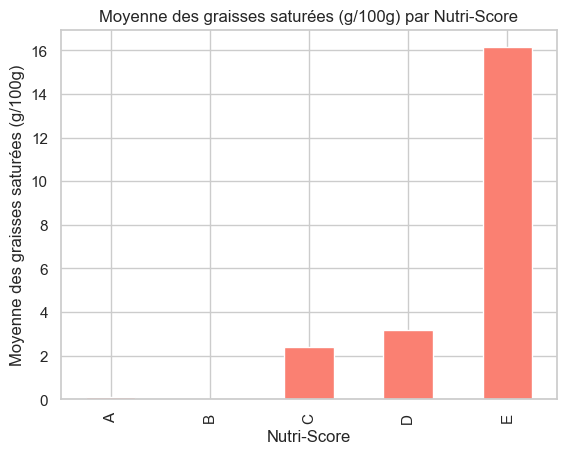

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier propre
df = pd.read_csv("../datas/FoodProduct_modifier.csv", encoding='utf-8')

# Nettoyer la colonne Nutri-Score (enlever espaces, mettre en majuscules)
df['Nutri-Score'] = df['Nutri-Score'].str.strip().str.upper()

# Convertir la colonne matière grasse saturée en numérique, forcer les erreurs en NaN
# Change ici le nom de la colonne si c’est juste "Matières grasses" ou autre
df['Graisses saturées (g/100g)'] = pd.to_numeric(df['Graisses saturées (g/100g)'], errors='coerce')

# Supprimer les lignes où Nutri-Score n'est pas dans ['A','B','C','D','E']
df = df[df['Nutri-Score'].isin(['A', 'B', 'C', 'D', 'E'])]

# Calculer la moyenne de graisses saturées par Nutri-Score (en ignorant les NaN)
moyenne_graisses_par_score = df.groupby('Nutri-Score')['Graisses saturées (g/100g)'].mean()

# Réordonner selon l'ordre Nutri-Score (A à E)
ordre = ['A', 'B', 'C', 'D', 'E']
moyenne_graisses_par_score = moyenne_graisses_par_score.reindex(ordre)

# Afficher la moyenne en console
print("Moyenne des graisses saturées (g/100g) par Nutri-Score :")
print(moyenne_graisses_par_score)

# Tracer un graphique en barres
moyenne_graisses_par_score.plot(kind='bar', color='salmon')
plt.title("Moyenne des graisses saturées (g/100g) par Nutri-Score")
plt.xlabel("Nutri-Score")
plt.ylabel("Moyenne des graisses saturées (g/100g)")
plt.ylim(0)  # commence à zéro pour une meilleure lisibilité
plt.show()


Moyenne d'énergie (kJ/100g) par Nutri-Score :
Nutri-Score
A     383.000000
B            NaN
C    1522.000000
D    1692.333333
E    5308.000000
Name: Énergie (kJ/100g), dtype: float64


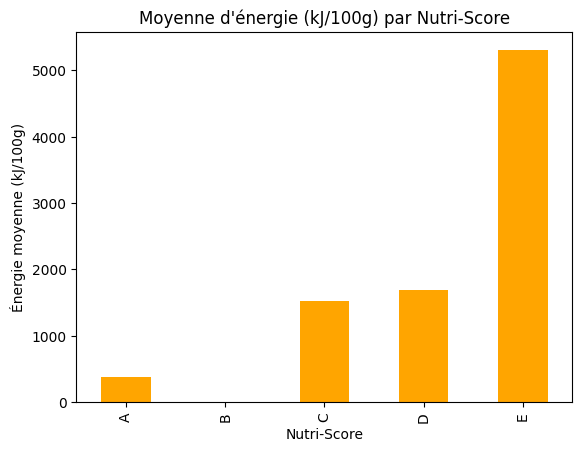

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier propre
df = pd.read_csv("../datas/FoodProduct_modifier.csv", encoding='utf-8')

# Nettoyer la colonne Nutri-Score (enlever espaces, mettre en majuscules)
df['Nutri-Score'] = df['Nutri-Score'].str.strip().str.upper()

# Convertir la colonne énergie en numérique (forcer les erreurs en NaN si nécessaire)
df['Énergie (kJ/100g)'] = pd.to_numeric(df['Énergie (kJ/100g)'], errors='coerce')

# Supprimer les lignes où Nutri-Score n'est pas dans ['A','B','C','D','E']
df = df[df['Nutri-Score'].isin(['A', 'B', 'C', 'D', 'E'])]

# Calculer la moyenne d'énergie par Nutri-Score (en ignorant les NaN)
moyenne_energie_par_score = df.groupby('Nutri-Score')['Énergie (kJ/100g)'].mean()

# Réordonner selon l'ordre Nutri-Score (A à E)
ordre = ['A', 'B', 'C', 'D', 'E']
moyenne_energie_par_score = moyenne_energie_par_score.reindex(ordre)

# Afficher la moyenne en console
print("Moyenne d'énergie (kJ/100g) par Nutri-Score :")
print(moyenne_energie_par_score)

# Tracer un graphique en barres
moyenne_energie_par_score.plot(kind='bar', color='orange')
plt.title("Moyenne d'énergie (kJ/100g) par Nutri-Score")
plt.xlabel("Nutri-Score")
plt.ylabel("Énergie moyenne (kJ/100g)")
plt.ylim(0)
plt.show()


Moyenne d'énergie (kcal/100g) par Nutri-Score :
Nutri-Score
A    145.800000
B           NaN
C    185.428571
D    284.715633
E    531.600000
Name: Énergie (kcal/100g), dtype: float64


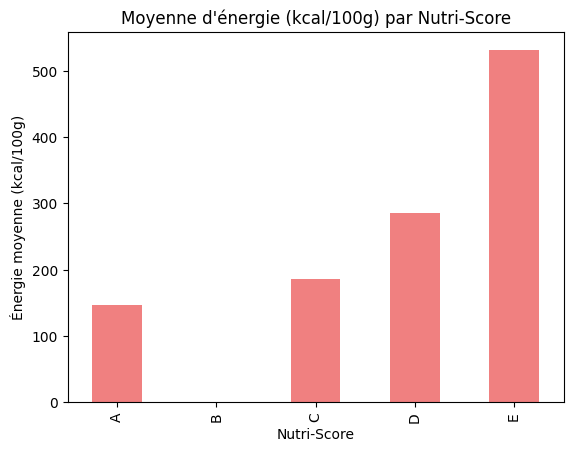

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier propre
df = pd.read_csv("../datas/FoodProduct_modifier.csv", encoding='utf-8')

# Nettoyer la colonne Nutri-Score
df['Nutri-Score'] = df['Nutri-Score'].str.strip().str.upper()

# Convertir la colonne énergie kcal en numérique
df['Énergie (kcal/100g)'] = pd.to_numeric(df['Énergie (kcal/100g)'], errors='coerce')

# Supprimer les lignes où Nutri-Score n’est pas dans A-E
df = df[df['Nutri-Score'].isin(['A', 'B', 'C', 'D', 'E'])]

# Calcul de la moyenne énergie (kcal) par Nutri-Score
moyenne_energie_kcal = df.groupby('Nutri-Score')['Énergie (kcal/100g)'].mean()

# Réordonner de A à E
ordre = ['A', 'B', 'C', 'D', 'E']
moyenne_energie_kcal = moyenne_energie_kcal.reindex(ordre)

# Affichage
print("Moyenne d'énergie (kcal/100g) par Nutri-Score :")
print(moyenne_energie_kcal)

# Graphe
moyenne_energie_kcal.plot(kind='bar', color='lightcoral')
plt.title("Moyenne d'énergie (kcal/100g) par Nutri-Score")
plt.xlabel("Nutri-Score")
plt.ylabel("Énergie moyenne (kcal/100g)")
plt.ylim(0)
plt.show()


Moyenne de Vitamine C (mg/100g) par Nutri-Score :
Nutri-Score
A    0.015000
B         NaN
C    0.011704
D    0.000000
E    0.000000
Name: vitamin-c_100g, dtype: float64


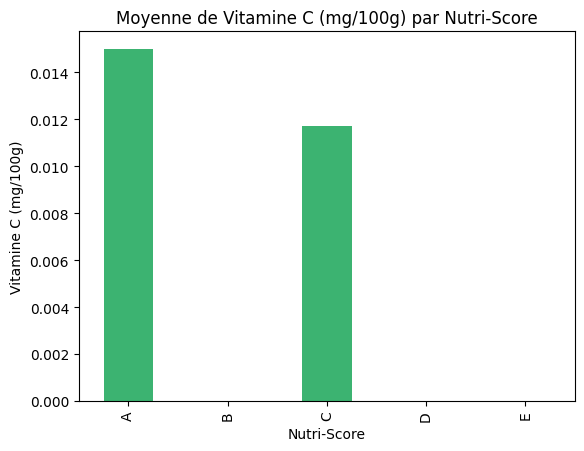

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier
df = pd.read_csv("../datas/FoodProduct_modifier.csv", encoding='utf-8')

# Nettoyer le Nutri-Score
df['Nutri-Score'] = df['Nutri-Score'].str.strip().str.upper()

# Convertir la colonne Vitamine C en numérique
df['vitamin-c_100g'] = pd.to_numeric(df['Vitamine C (mg/100g)'], errors='coerce')

# Supprimer les lignes où le Nutri-Score n’est pas A-E
df = df[df['Nutri-Score'].isin(['A', 'B', 'C', 'D', 'E'])]

# Calcul de la moyenne par Nutri-Score
moyenne_vitc = df.groupby('Nutri-Score')['vitamin-c_100g'].mean()

# Réordonner A à E
ordre = ['A', 'B', 'C', 'D', 'E']
moyenne_vitc = moyenne_vitc.reindex(ordre)

# Afficher dans la console
print("Moyenne de Vitamine C (mg/100g) par Nutri-Score :")
print(moyenne_vitc)

# Tracer un graphique
moyenne_vitc.plot(kind='bar', color='mediumseagreen')
plt.title("Moyenne de Vitamine C (mg/100g) par Nutri-Score")
plt.xlabel("Nutri-Score")
plt.ylabel("Vitamine C (mg/100g)")
plt.ylim(0)
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import History

# One-hot encoding des labels
y_cat = to_categorical(y_enc)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y_cat, random_state=42)

# Modèle
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes Nutri-Score

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement avec historique
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Affichage des courbes d'accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Évolution de la précision au fil des epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'